# LAPTOP PRICE PREDICTOR USING MACHINE LEARNING TECHNIQUES

## Problem Statement:  
The objective of this project is to create end to end machine learning model to predict prices of laptop based on given set of features. If a user who is not aware of  price of laptops, but knows the features by selecting the  desired features and configurations, we can predict the price using our website.

## Importing Libraries

In [1755]:
import pandas as pd
import numpy as np

In [1756]:
# laptop dataset
url=('https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv')


## data preprocessing
 This is basically a Regression problem

In [1757]:
df = pd.read_csv(url)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [1758]:
df.shape

(1303, 12)

In [1759]:
# we have few unnecessary columns here
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [1760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1761]:
# check for null(missing) values- fortunately there are no null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1762]:
df.duplicated().sum()

np.int64(0)

## further clean up the data we need to follow these steps
 1. As Unnamed column have no significance with the problem it can be removed
 2. Ram has object data type because of word 'GB', inorder to makw it as integer data type we are removeing 'GB'
 3. Same in the case of Weight (kg) is been removed and make it as float data type


In [1763]:
df.drop(columns=['Unnamed: 0'], inplace= True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1764]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [1765]:
# but still the datatype of RAM and Weight ae object
df['Ram'].dtype, df['Weight'].dtype

(dtype('O'), dtype('O'))

In [1766]:
# we need to replace it
df['Ram']=df['Ram'].astype('int64')
df['Weight']=df['Weight'].astype('float64')

In [1767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## EDA

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/2190544972.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

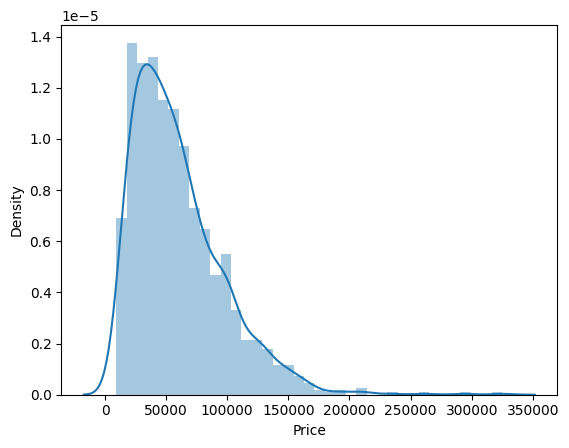

In [1768]:
# check for Price
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Price'])
# as our data is left skewed

<Axes: xlabel='Company'>

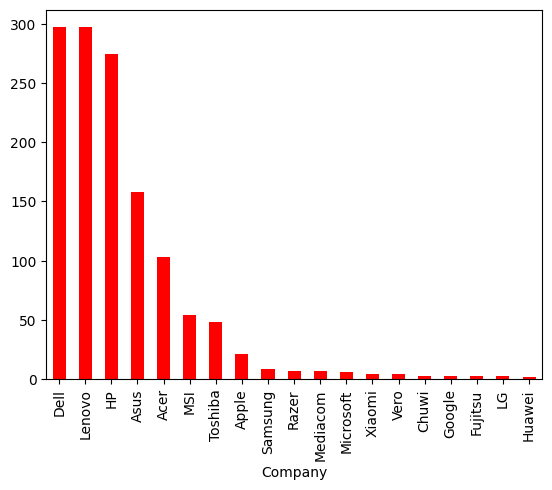

In [1769]:
# check for company
df['Company'].value_counts().plot(kind='bar',color='red')


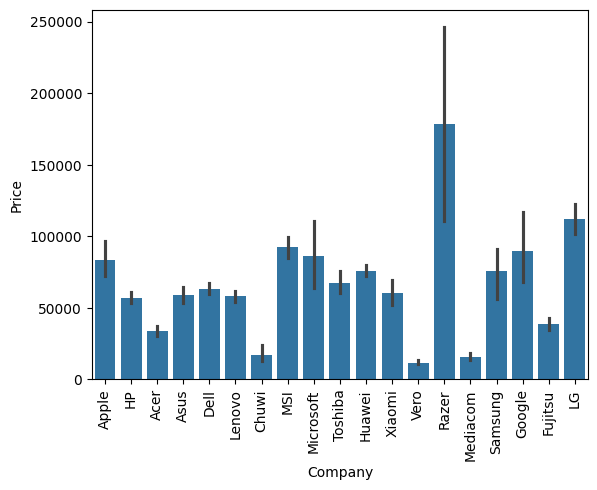

In [1770]:
# check the price of each brands
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

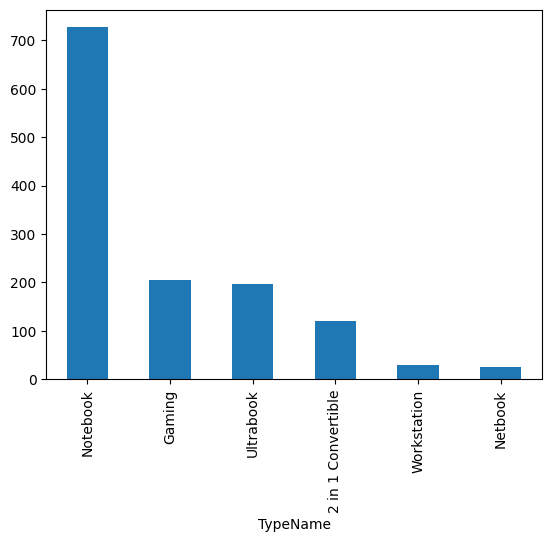

In [1771]:
# check for typename
df['TypeName'].value_counts().plot(kind='bar')

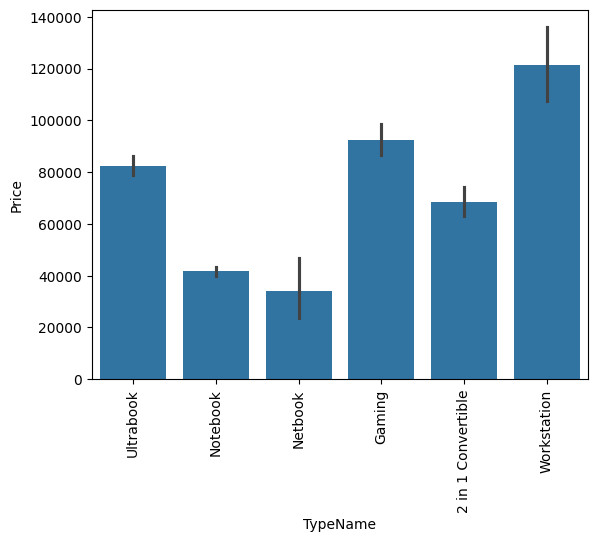

In [1772]:
# check the price of each typename
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/353544330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'], color='black')


<Axes: xlabel='Inches', ylabel='Density'>

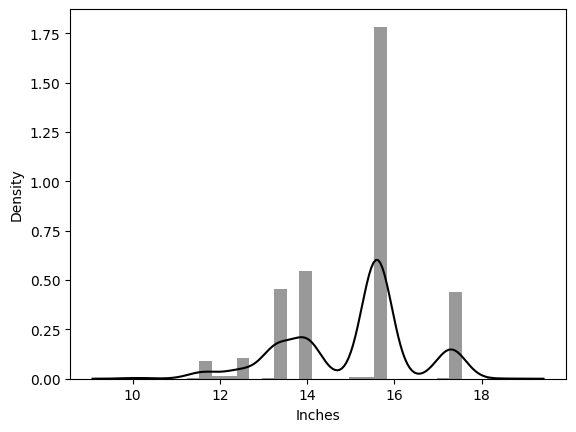

In [1773]:
# check for size column
sns.distplot(df['Inches'], color='black')

<Axes: xlabel='Inches', ylabel='Price'>

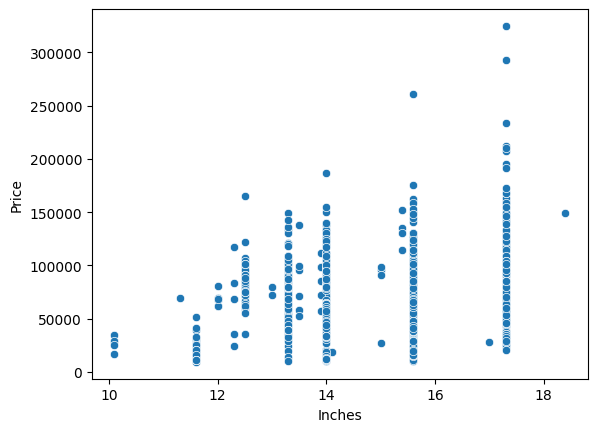

In [1774]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

## Feature engineering

In [1775]:
# check for screenresoluation
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [1776]:
# segrigate touchscreen, ips panel etc
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [1777]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [1778]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
829,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,32980.3200,0
1142,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,86793.1200,1
335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,67559.0400,0
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0
338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651.4672,0
365,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,2.04,20725.9200,0
671,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,1.90,43580.3760,0


<Axes: xlabel='Touchscreen'>

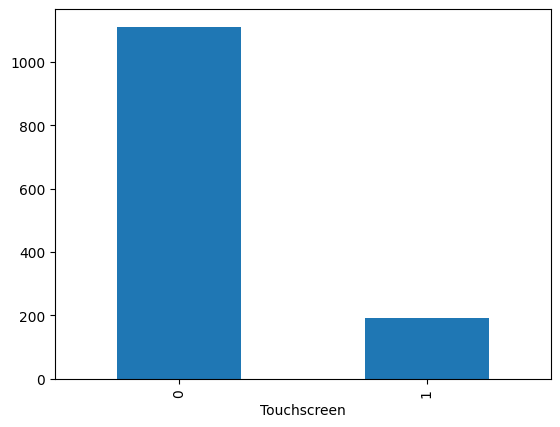

In [1779]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

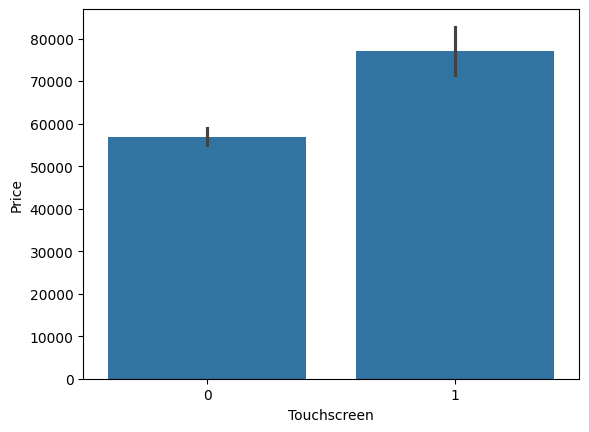

In [1780]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [1781]:
# ips panel 
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [1782]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [1783]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1176,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32,43956.000,0,0
1156,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.384,0,0
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.520,0,0
474,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06,69210.720,0,1
33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,99580.320,1,0


<Axes: xlabel='Ips'>

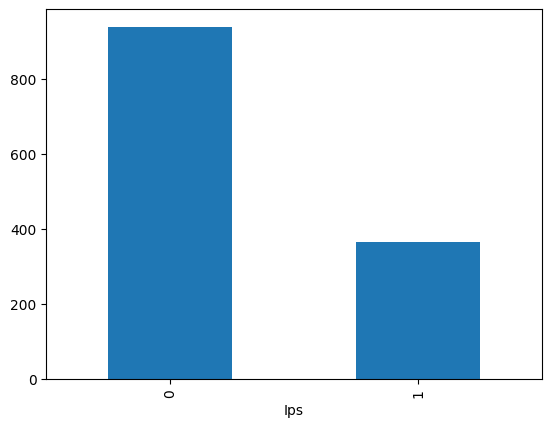

In [1784]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

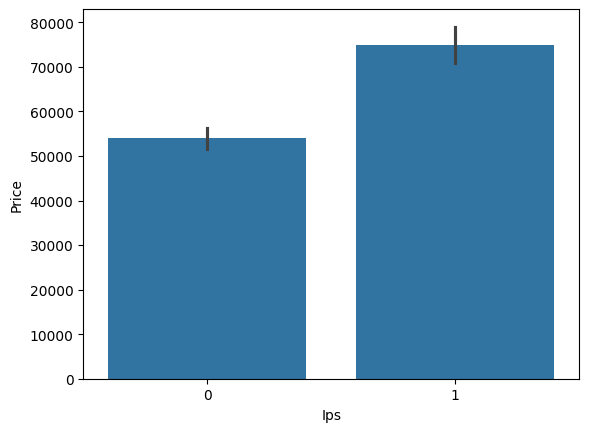

In [1785]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [1786]:
# spliting Screenresoluation - 1920x1080
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [1787]:
df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [1788]:
new= df['ScreenResolution'].str.split('x',n=1,expand=True)

In [1789]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [1790]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [1791]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
531,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,45820.8000,0,1,IPS Panel Full HD 1920,1080
1155,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,25515.2592,0,0,Full HD 1920,1080
212,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,18594.7200,0,0,Full HD 1920,1080
911,HP,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,240GB SSD,Intel HD Graphics 515,Windows 10,1.09,165168.0000,1,0,4K Ultra HD / Touchscreen 3840,2160
470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160


In [1792]:
# as Y_res is ok, there is problem with X_res
# we need to write a reg expression
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

In [1793]:
# values are in list so,
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [1794]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [1795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [1796]:
# as data type of X_res, Y_res are object, we need to change to integer
df['X_res']=df['X_res'].astype('int64')
df['Y_res']=df['Y_res'].astype('int64')

In [1797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [1798]:
# check the correlation
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [1799]:
# lets make a new column called PPI(Picels per inches)
df['ppi']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [1800]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [1801]:
# Now lets drop bewlow columns
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [1802]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [1803]:
# lets target Cpu column
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [1804]:
# Cpu split into 5 columns
df['Cpu components']=df['Cpu'].apply(lambda x:x.split()[0:3])

In [1805]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,"[Intel, Core, i5]"


In [1806]:
df['Cpu components']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [1807]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [1808]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [1809]:
df['Cpu brand'] = df['Cpu components'].apply(fetch_processor)

In [1810]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu components,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

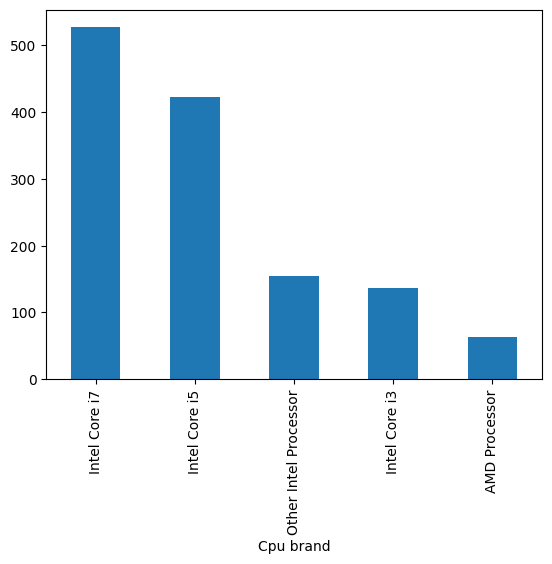

In [1811]:
df['Cpu brand'].value_counts().plot(kind='bar')

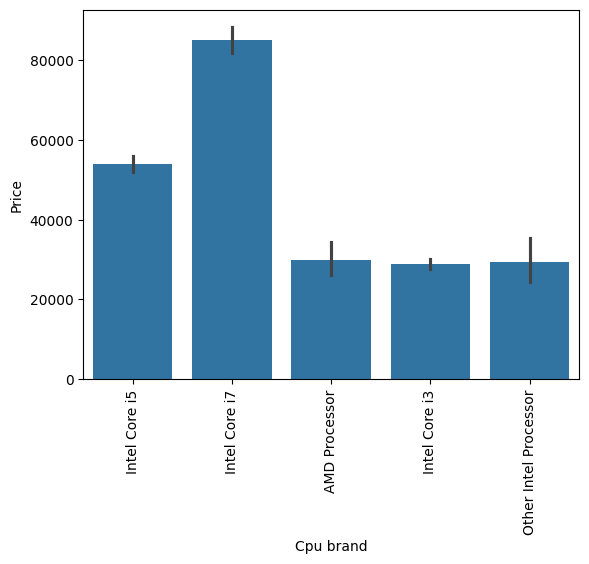

In [1812]:
# check price vs processor
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1813]:
# now, we can drop cpu , cpu components
df.drop(columns=['Cpu','Cpu components'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

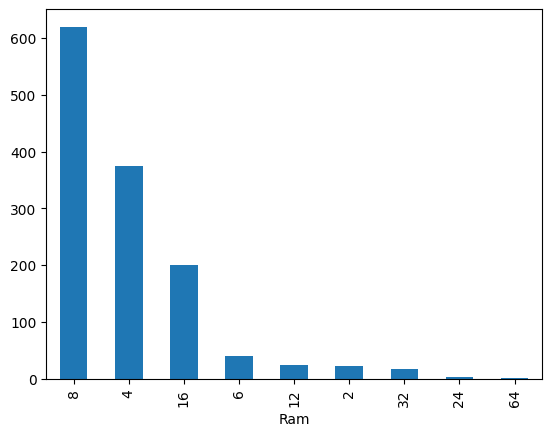

In [1814]:
# check Ram
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

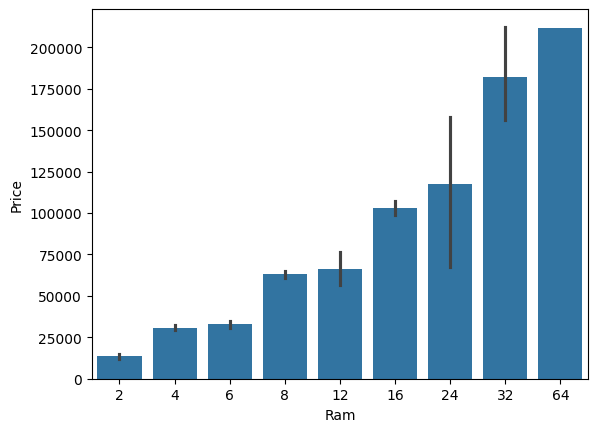

In [1815]:
sns.barplot(x=df['Ram'], y=df['Price'])

In [1816]:
# lets check memory
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [1817]:
# Clean 'Memory' column and split into two parts
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split("+", n=1, expand=True)

df['first'] = new[0].str.strip()
df['second'] = new[1]

# Identify storage types in first layer
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Clean and convert 'first' column
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['first'] = df['first'].replace('', '0')
df['first'] = df['first'].astype(int)

# Fill missing values and process 'second' column
df['second'] = df['second'].fillna('0')
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].replace('', '0')
df['second'] = df['second'].astype(int)

# Create final storage feature columns
df['HDD'] = (df['first'] * df['Layer1HDD']) + (df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD']) + (df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid']) + (df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage']) + (df['second'] * df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/62850368.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [1818]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [1819]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
964,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.04,45101.52,0,0,100.454670,Intel Core i5,1000,0,0,0
576,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.24,99367.20,1,0,157.350512,Intel Core i7,0,512,0,0
335,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.48,67559.04,0,0,157.350512,Intel Core i5,0,256,0,0
147,Asus,Notebook,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.00,18328.32,0,0,141.211998,Other Intel Processor,1000,0,0,0
177,MSI,Gaming,32,512 SSD + 1000 HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.72,0,0,119.723216,Intel Core i7,1000,512,0,0


In [1820]:
# drop memory column
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [1821]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [1822]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [1823]:
# check Gpu
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [1824]:
# split brand names from Gpu
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [1825]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [1826]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

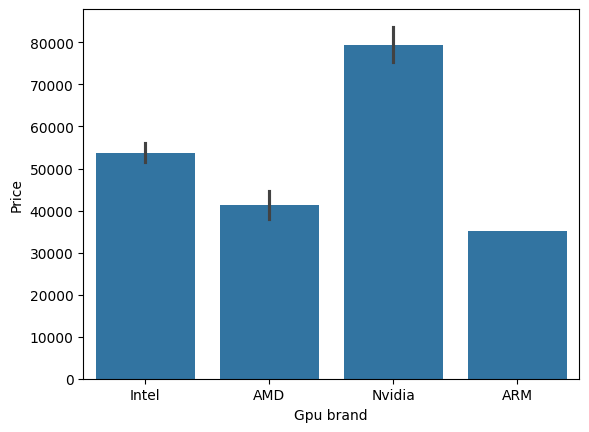

In [1827]:
# check price vs Gpu brand
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [1828]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [1829]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

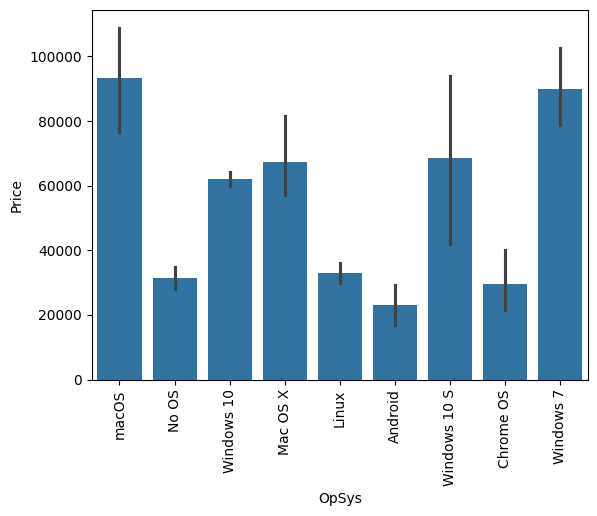

In [1830]:
# check price vs OpSys brand
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1831]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [1832]:
df['Os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [1833]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


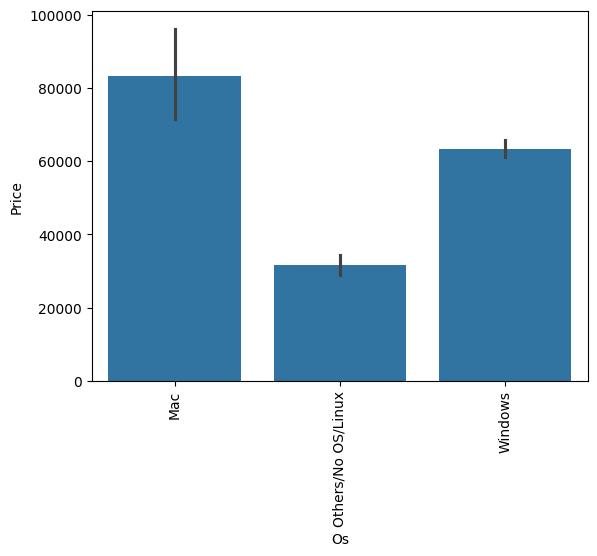

In [1834]:
# check price vs OpSys brand
sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/639149099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'],color='black')


<Axes: xlabel='Weight', ylabel='Density'>

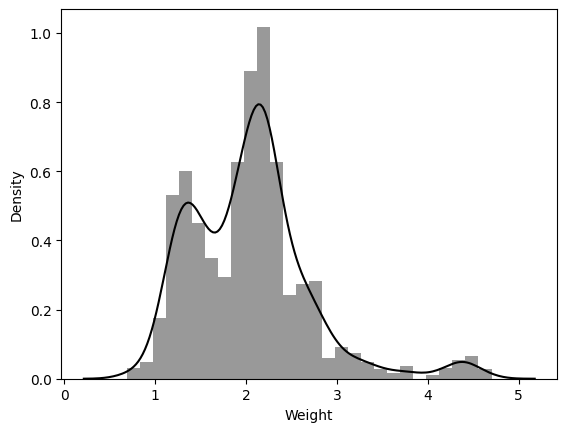

In [1835]:
# check for weight
sns.distplot(df['Weight'],color='black')

<Axes: xlabel='Weight', ylabel='Price'>

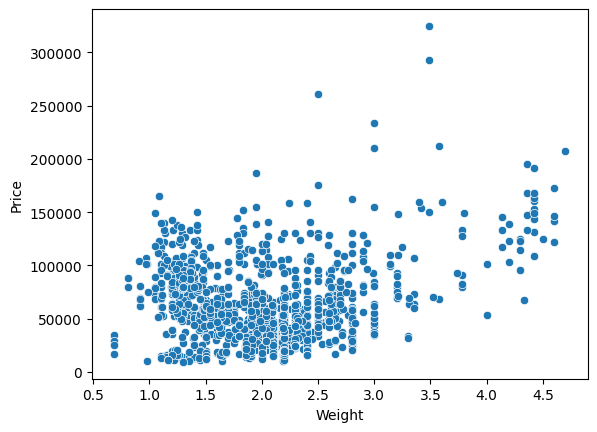

In [1836]:
# it is slighlty linear
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [1837]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

In [1838]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383874,0.743007,0.116984,0.206623,0.303763,0.096288,0.603634
Weight,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.323240,0.514491,-0.062742
Price,0.743007,0.210370,1.000000,0.191226,0.252208,0.473487,-0.096441,0.670799
Touchscreen,0.116984,-0.294620,0.191226,1.000000,0.150512,0.460587,-0.209733,0.255092
Ips,0.206623,0.016967,0.252208,0.150512,1.000000,0.300879,-0.094461,0.223795
ppi,0.303763,-0.323240,0.473487,0.460587,0.300879,1.000000,-0.295411,0.506895
HDD,0.096288,0.514491,-0.096441,-0.209733,-0.094461,-0.295411,1.000000,-0.399896
SSD,0.603634,-0.062742,0.670799,0.255092,0.223795,0.506895,-0.399896,1.000000


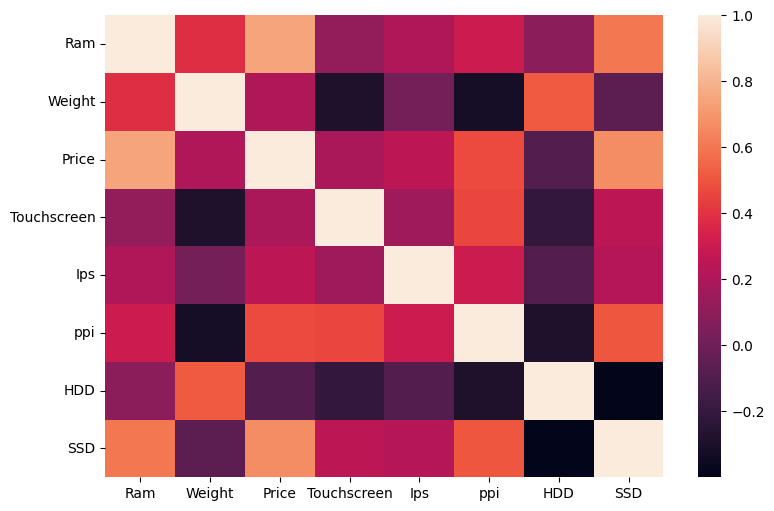

In [1839]:
# heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/697530498.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

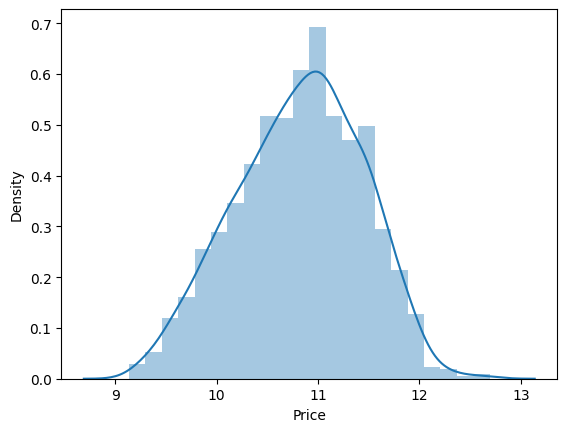

In [1840]:
#finally, we need convert skewed to normal curve by using log transformation
sns.distplot(np.log(df['Price']))

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/2052448756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

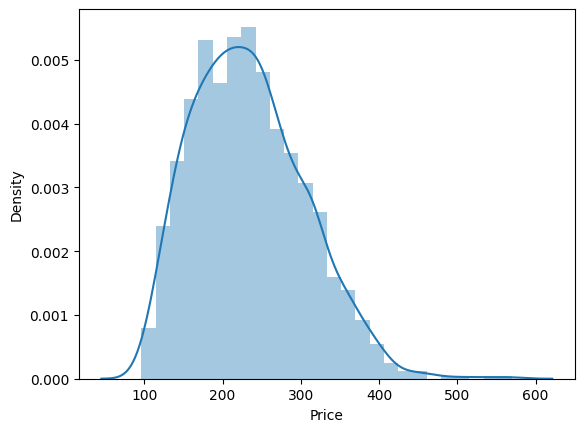

In [1841]:
sns.distplot(np.sqrt(df['Price']))

/var/folders/fc/gc7gsrvn6m735nl49vdq6s880000gn/T/ipykernel_80559/3329408040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

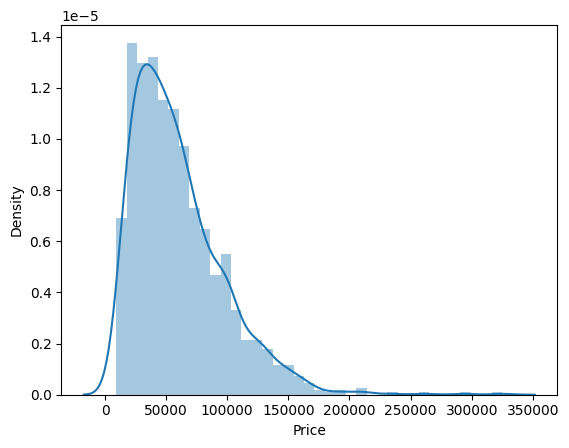

In [1842]:
sns.distplot((df['Price']))

## Splitting the data

In [1843]:
X=df.drop(columns=['Price'])
y= np.log(df['Price'])

In [1844]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [1845]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [1846]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state= 42)

In [1847]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
409,Lenovo,Notebook,2,1.15,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
432,Lenovo,Notebook,4,1.70,0,1,157.350512,Intel Core i3,0,128,Intel,Windows
471,HP,Notebook,8,1.90,0,0,141.211998,Intel Core i5,500,0,AMD,Windows
1156,MSI,Gaming,16,2.70,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
174,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
1294,HP,Notebook,6,2.04,0,0,141.211998,AMD Processor,0,0,AMD,Windows
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


## Onehot encoding

In [1848]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

## Machine Learning Models and Traning

In [1849]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [1850]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error


## Linear Regression

In [1851]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_L=r2_score(y_test,y_pred)
mean_absolute_error_L=mean_absolute_error(y_test,y_pred)
print("r2_score: {:.3f}".format(r2_score_L))
print("Mean_absolute_error: {:.3f}".format(mean_absolute_error_L))

r2_score: 0.830
Mean_absolute_error: 0.194


## Lasso Regression

In [1852]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_LA=r2_score(y_test,y_pred)
mean_absolute_error_LA=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_LA))
print("MSE: {:.3f}".format(mean_absolute_error_LA))

R2_score: 0.823
MSE: 0.198


## Ridge Refression

In [1853]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_RR=r2_score(y_test,y_pred)
mean_absolute_error_RR=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_RR))
print("MSE: {:.3f}".format(mean_absolute_error_RR))

R2_score: 0.821
MSE: 0.199


## KNN

In [1854]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_KNN=r2_score(y_test,y_pred)
mean_absolute_error_KNN=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_KNN))
print("MSE: {:.3f}".format(mean_absolute_error_KNN))

R2_score: 0.774
MSE: 0.212


## SVM

In [1855]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_SVR=r2_score(y_test,y_pred)
mean_absolute_error_SVR=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_SVR))
print("MSE: {:.3f}".format(mean_absolute_error_SVR))


R2_score: 0.845
MSE: 0.178


## Decision Tree

In [1856]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf= 5,min_samples_split=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred)
mean_absolute_error_DT=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_DT))
print("MSE: {:.3f}".format(mean_absolute_error_DT))

R2_score: 0.814
MSE: 0.196


## Random Forest

In [1857]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_RF=r2_score(y_test,y_pred)
mean_absolute_error_RF=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_RF))
print("MSE: {:.3f}".format(mean_absolute_error_RF))

R2_score: 0.867
MSE: 0.163


## Extra Trees

In [1858]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=True,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_ET=r2_score(y_test,y_pred)
mean_absolute_error_ET=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_ET))
print("MSE: {:.3f}".format(mean_absolute_error_ET))

R2_score: 0.843
MSE: 0.169


## AdaBoost

In [1859]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_AB=r2_score(y_test,y_pred)
mean_absolute_error_AB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_AB))
print("MSE: {:.3f}".format(mean_absolute_error_AB))

R2_score: 0.784
MSE: 0.222


## Gradient Boost

In [1860]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_GB=r2_score(y_test,y_pred)
mean_absolute_error_GB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_GB))
print("MSE: {:.3f}".format(mean_absolute_error_GB))

R2_score: 0.883
MSE: 0.151


## Stacking

In [1861]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    # ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)),
    ('lgb',LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)),]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_SK=r2_score(y_test,y_pred)
mean_absolute_error_SK=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_SK))
print("MSE: {:.3f}".format(mean_absolute_error_SK))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1107, number of used features: 26
[LightGBM] [Info] Start training from score 10.817893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Voting Regressor

In [1862]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# lgb=LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)

# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)


# cb=CatBoostRegressor(depth = 4, l2_leaf_reg= 4, learning_rate= 0.15,one_hot_max_size=50)
# xgb=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5,min_child_weight=1,gamma=0.0)
# step2 = VotingRegressor([('lgb', lgb), ('gbdt', gbdt),('cb',cb),('xgb',xgb)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2_score_VR=r2_score(y_test,y_pred)
# mean_absolute_error_VR=mean_absolute_error(y_test,y_pred)
# print("R2_score: {:.3f}".format(r2_score_VR))
# print("MSE: {:.3f}".format(mean_absolute_error_VR))

## XGBoost

In [1863]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5,min_child_weight=1,gamma=0.0)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2_score_XG=r2_score(y_test,y_pred)
# mean_absolute_error_XG=mean_absolute_error(y_test,y_pred)
# print("R2_score: {:.3f}".format(r2_score_XG))
# print("MSE: {:.3f}".format(mean_absolute_error_XG))

## Catboost

In [1864]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = CatBoostRegressor(depth = 4, l2_leaf_reg= 4, learning_rate= 0.15,one_hot_max_size=50,iterations=None)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_CB=r2_score(y_test,y_pred)
mean_absolute_error_CB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_CB))
print("MSE: {:.3f}".format(mean_absolute_error_CB))


0:	learn: 0.5660567	total: 1.08ms	remaining: 1.07s
1:	learn: 0.5160677	total: 1.36ms	remaining: 677ms
2:	learn: 0.4714781	total: 1.52ms	remaining: 506ms
3:	learn: 0.4374865	total: 1.72ms	remaining: 429ms
4:	learn: 0.4086089	total: 1.88ms	remaining: 374ms
5:	learn: 0.3860862	total: 2.04ms	remaining: 338ms
6:	learn: 0.3629607	total: 2.19ms	remaining: 310ms
7:	learn: 0.3451643	total: 2.34ms	remaining: 291ms
8:	learn: 0.3328100	total: 2.5ms	remaining: 275ms
9:	learn: 0.3199787	total: 2.66ms	remaining: 263ms
10:	learn: 0.3085629	total: 2.8ms	remaining: 252ms
11:	learn: 0.2984366	total: 2.95ms	remaining: 243ms
12:	learn: 0.2915916	total: 3.08ms	remaining: 234ms
13:	learn: 0.2842556	total: 3.21ms	remaining: 226ms
14:	learn: 0.2779272	total: 3.36ms	remaining: 221ms
15:	learn: 0.2713583	total: 3.51ms	remaining: 216ms
16:	learn: 0.2673904	total: 3.66ms	remaining: 211ms
17:	learn: 0.2634052	total: 3.8ms	remaining: 207ms
18:	learn: 0.2602312	total: 3.94ms	remaining: 203ms
19:	learn: 0.2571947	tota

## LightGbm

In [1865]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LGBMRegressor(max_depth = 25,learning_rate= 0.1,num_leaves=300,n_estimators=300)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2_score_LGB=r2_score(y_test,y_pred)
mean_absolute_error_LGB=mean_absolute_error(y_test,y_pred)
print("R2_score: {:.3f}".format(r2_score_LGB))
print("MSE: {:.3f}".format(mean_absolute_error_LGB))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1107, number of used features: 26
[LightGBM] [Info] Start training from score 10.817893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/chaitu/Documents/Laptop-Price-Prediction/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Comparison of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [1866]:
import pandas as pd

data = {
  "ML_Model ": ['Catboost','Gradient boost','LightGBM',
              'Stacking','Random Forest','Extra Tree','Support Vector Regressor','Linear Regression',
              'Lasso Regression','Ridge Regression','Decision Trees','Ada boost','K-Nearest Neighbors'],
  "R2_Score": [89.7,88.3,88.1,87.9,86.7,84.3,84.5,83,82.3,82.1,81.5,78.9,77.4],
  "Mean_absolute_error": [14.5,15.1,15.4,15.7,16.3,16.9,17.8,19.4,19.8,19.9,19.6,22.5,21.2]
}

#load data into a DataFrame object:
df1 = pd.DataFrame(data)
df1

,ML_Model,R2_Score,Mean_absolute_error
0,Catboost,89.7,14.5
1,Gradient boost,88.3,15.1
2,LightGBM,88.1,15.4
3,Stacking,87.9,15.7
4,Random Forest,86.7,16.3
5,Extra Tree,84.3,16.9
6,Support Vector Regressor,84.5,17.8
7,Linear Regression,83.0,19.4
8,Lasso Regression,82.3,19.8
9,Ridge Regression,82.1,19.9


 ## Exporting the model

In [1867]:
import pickle

In [1868]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [1869]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
